### Задание 4.3
2 points possible (graded)

Ниже представлен код для генерации задачи классификации и отрисовки диаграммы рассеяния с цветовой группировкой по классам.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree, model_selection

<AxesSubplot: xlabel='feature_1', ylabel='feature_2'>

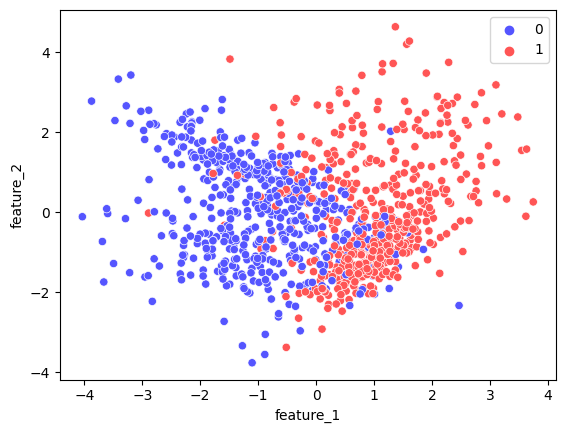

In [13]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000,  # количество объектов
    n_features=2,  # количество признаков
    n_informative=2,  # количество информативных признаков
    n_redundant=0,  # количество неинформативных признаков
    n_classes=2,  # количество классов
    n_clusters_per_class=2,  # количество кластеров внутри класса
    random_state=1  # генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic')


Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.



In [14]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model_bad = tree.DecisionTreeClassifier(max_depth=27)
model_bad.fit(X_train, y_train)
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
print(f'Train accuracy {metrics.accuracy_score(y_train, y_train_pred):.2f}')
print(f'Validation accuracy {metrics.accuracy_score(y_valid, y_valid_pred):.2f}')

Train accuracy 1.00
Validation accuracy 0.82


/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


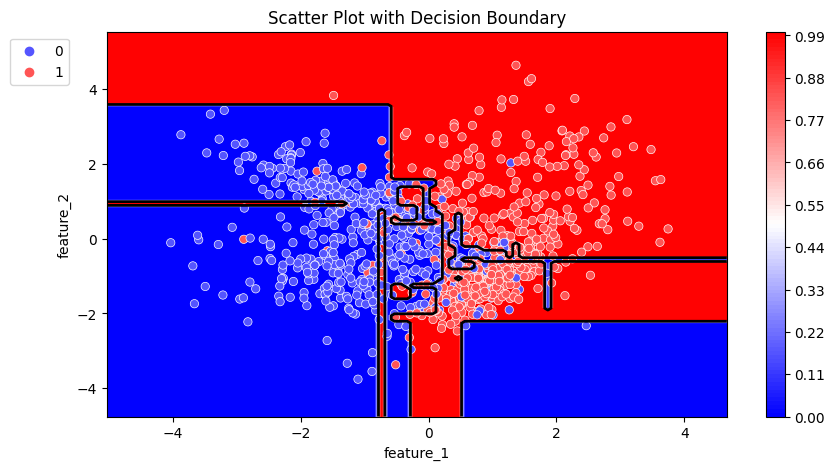

In [23]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199,
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку.
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize=(10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
    #Добавляем цветовую панель
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1],
                    hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary')
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))


plot_probabilities_2d(X, y, model_bad)


In [24]:
print('Current depth:', model_bad.get_depth())


Current depth: 15


In [25]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy',  # критерий информативности
    max_depth=7,  # ограничиваем глубину дерева
    random_state=42,  # генератор случайных чисел
    class_weight='balanced'  # веса классов
)

#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)

#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model,  # модель
    X=X,  # матрица наблюдений X
    y=y,  # вектор ответов y
    cv=skf,  # кросс-валидатор
    scoring='f1',  # метрика
    return_train_score=True  # подсчёт метрики на тренировочных фолдах
)

print(
    'Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1: 0.92
Valid k-fold mean f1: 0.84


### Задание 4.6

2 points possible (graded)
Для выполнения этого задания используйте сгенерированные тренировочную и валидационную выборки из задания 4.3.

Обучите модель дерева решений с глубиной 3 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.

Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.



In [26]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
print(f'Train accuracy {metrics.accuracy_score(y_train, y_train_pred):.2f}')
print(
    f'Validation accuracy {metrics.accuracy_score(y_valid, y_valid_pred):.2f}')


Train accuracy 0.88
Validation accuracy 0.85


/home/alexey/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


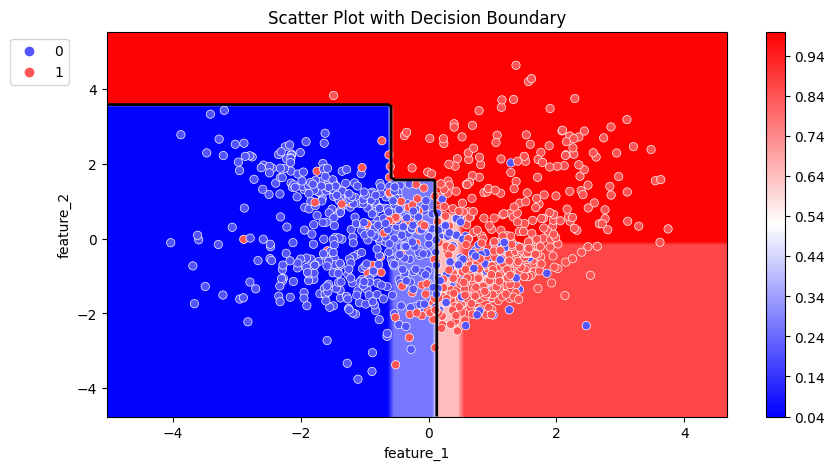

In [27]:
plot_probabilities_2d(X, y, model)